# DAT210x - Programming with Python for DS

## Module4- Lab1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
!pip install plyfile 
from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [3]:
reduce_factor = 100
!curl https://raw.githubusercontent.com/muke888/MS-Python/master/stanford_armadillo.ply -o stanford_armadillo.ply

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6757k  100 6757k    0     0  9437k      0 --:--:-- --:--:-- --:--:-- 9437k


Load up the scanned armadillo:

In [4]:
plyfile = PlyData.read('stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

### PCA

In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

**NOTE-1**: Be sure to RETURN your projected armadillo rather than `None`! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

**NOTE-2**: Regarding the `svd_solver` parameter, simply pass that into your PCA model constructor as-is, e.g. `svd_solver=svd_solver`.

For additional details, please read through [Decomposition - PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [5]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2, svd_solver='full')
#pca.fit(armadillo)
#T = pca.transform(armadillo)

In [6]:
def do_PCA(armadillo,svd_solver):
    from sklearn.decomposition import PCA
    from sklearn.decomposition import RandomizedPCA
    pca = PCA(n_components=2,svd_solver=svd_solver)
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    
    return T

#def do_RandomizedPCA(armadillo):
    #from sklearn.decomposition import RandomizedPCA
    #rpca = RandomizedPCA(n_components = 2)
    #rpca.fit(armadillo)
    #R = rpca.transform(armadillo)
    
    #return R

### Preview the Data

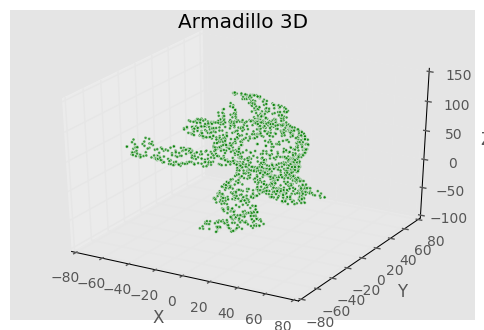

In [7]:
# Render the Original Armadillo
%matplotlib inline  
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

### Time Execution Speeds

Let's see how long it takes PCA to execute:

In [8]:
%timeit pca = do_PCA(armadillo, 'full')
pca = do_PCA(armadillo, 'full')

The slowest run took 1244.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 669 Âµs per loop


Render the newly transformed PCA armadillo!

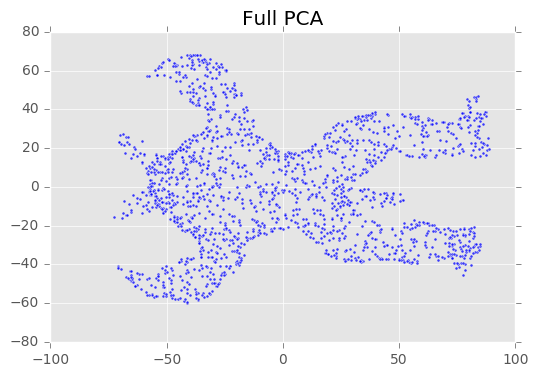

In [9]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Full PCA')
ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

Let's also take a look at the speed of the randomized solver on the same dataset. It might be faster, it might be slower, or it might take exactly the same amount of time to execute:

In [12]:
%timeit rpca = do_PCA(armadillo, 'randomized')
rpca = do_PCA(armadillo, 'randomized')

1000 loops, best of 3: 1.92 ms per loop


Let's see what the results look like:

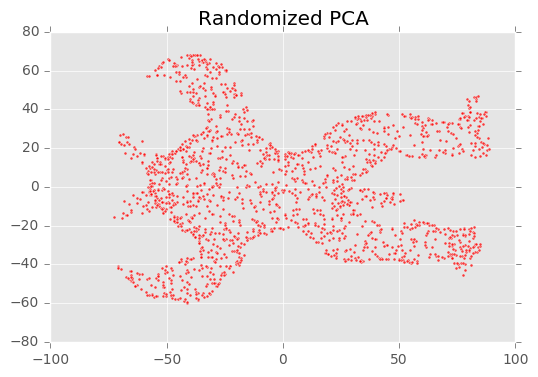

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Randomized PCA')
ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
plt.show()